In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.integrate import quad


### Template fitting to convert M1450 -> ionizing Ndot

https://ui.adsabs.harvard.edu/abs/2012MNRAS.427.1800R/abstract

https://ui.adsabs.harvard.edu/abs/2012MNRAS.422..478R/abstract

<!-- https://ui.adsabs.harvard.edu/abs/2012MNRAS.426.2677R/abstract -->
https://ui.adsabs.harvard.edu/abs/2015MNRAS.449.4204L/abstract

In [8]:
f_nu=lambda mAB: 10**(-(mAB+48.6)/2.5)
pc2cm=3.086e+18
MagAB_to_Lnu=lambda MagAB: 4*np.pi*(10*pc2cm)**2*f_nu(MagAB) # in unit erg s^-1 Hz^-1
c=2.99792458e10
nuHz_to_lambdaAA=lambda nuHz:1e8*c/nuHz
lambdaAA_to_nuHz=lambda lambdaAA: c/(1e-8*lambdaAA)

nu1450=lambdaAA_to_nuHz(1450)
MagAB_to_nuLnu=lambda MagAB:nu1450*MagAB_to_Lnu(MagAB)
MagAB_to_Liso =lambda MagAB:10**(4.74+0.91*np.log10(MagAB_to_nuLnu(MagAB))) # Eq (9) of Russo+12

In [19]:
lambdaAA_to_nuHz(912)/1e15

3287198004385964.5

In [10]:
nu912=lambdaAA_to_nuHz(912)
nu_lo=lambdaAA_to_nuHz(10000) #1 mu m
nu_hi=lambdaAA_to_nuHz(1.5) # 8 keV

def Lum_nu_spec(nu, L_at_nu0, nu0, alpha_nu):
    return L_at_nu0*(nu/nu0)**alpha_nu

def calc_Lbol(L_nu_at912,alpha_nu_red,alpha_nu_blue):
    red=quad(Lum_nu_spec,nu_lo,lambdaAA_to_nuHz(912),args=(L_nu_at912,lambdaAA_to_nuHz(912),alpha_nu_red))[0]
    blue=quad(Lum_nu_spec,lambdaAA_to_nuHz(912),nu_hi,args=(L_nu_at912,lambdaAA_to_nuHz(912),alpha_nu_blue))[0]
    return red+blue

hplanck=6.62607015e-27
def Ndot_nu_spec(nu, L_at_nu0, nu0, alpha_nu):
    return Lum_nu_spec(nu, L_at_nu0, nu0, alpha_nu)/hplanck/nu

def Ndot_tot(Lnu_at_HIedge,alpha_nu):
#     print(lambdaAA_to_nuHz(912),lambdaAA_to_nuHz(12))
#     print(quad(Ndot_nu_spec,lambdaAA_to_nuHz(912),lambdaAA_to_nuHz(0.912),args=(Lnu_at_HIedge,lambdaAA_to_nuHz(912),alpha_nu)))
    return quad(Ndot_nu_spec,lambdaAA_to_nuHz(912),lambdaAA_to_nuHz(0.912),args=(Lnu_at_HIedge,lambdaAA_to_nuHz(912),alpha_nu))[0]


In [11]:
def M1450_to_Ntot(M1450,method="Runnoe12+Lusso15"):
    if method=="Runnoe12+Lusso15":
        alpha_nu_red=-0.61
        alpha_nu_blue=-1.7
        L_nu_at912=MagAB_to_Liso(M1450)/calc_Lbol(1,alpha_nu_red,alpha_nu_blue)
        return Ndot_tot(L_nu_at912,alpha_nu_blue)

In [5]:
qso={'Name':["J062-01","J0020-3653","J0244-5008","J0252-0503","J0411-0907","J1104+2134"],
    'redshift':[6.99,6.8540,6.7240,7.0006,6.8190,6.7662],
    'M1450':[-28.12,-26.94,-26.72,-26.63,-26.61,-26.67],
    }

In [6]:
qso["Ndot"]=[M1450_to_Ntot(M) for M in qso["M1450"]]

In [7]:
df=pd.DataFrame(qso)


In [8]:
df

,Name,redshift,M1450,Ndot
0,J062-01,6.9900,-28.12,4.489466e+57
1,J0020-3653,6.8540,-26.94,1.669839e+57
2,J0244-5008,6.7240,-26.72,1.388656e+57
3,J0252-0503,7.0006,-26.63,1.287759e+57
4,J0411-0907,6.8190,-26.61,1.266353e+57
5,J1104+2134,6.7662,-26.67,1.331664e+57


In [19]:
# df.to_csv("qso.csv")

In [20]:
df

,Name,redshift,M1450,Ndot
0,J062-01,6.9900,-28.12,4.489466e+57
1,J0020-3653,6.8540,-26.94,1.669839e+57
2,J0244-5008,6.7240,-26.72,1.388656e+57
3,J0252-0503,7.0006,-26.63,1.287759e+57
4,J0411-0907,6.8190,-26.61,1.266353e+57
5,J1104+2134,6.7662,-26.67,1.331664e+57


In [5]:
qso={'Name':["J036+03"],
    'redshift':[6.5412],
    'M1450':[-27.36],
    }

In [6]:
qso["Ndot"]=[M1450_to_Ntot(M) for M in qso["M1450"]]

In [7]:
df=pd.DataFrame(qso)


In [8]:
df.to_csv("qso_z65.csv")

In [9]:
df

,Name,redshift,M1450,Ndot
0,J036+03,6.5412,-27.36,2.374404e+57


In [13]:
qso={'Name':["J158-14","J1306+0356","J1319+0950","J1428-1602","J1509-1749"],
    'redshift':[6.0681,6.0330,6.1347,6.1498,6.1225],
    'M1450':[-27.32,-26.76,-26.99,-26.89,-27.09],
    }

In [14]:
qso["Ndot"]=[M1450_to_Ntot(M) for M in qso["M1450"]]

In [15]:
df=pd.DataFrame(qso)
df

,Name,redshift,M1450,Ndot
0,J158-14,6.0681,-27.32,2.296120e+57
1,J1306+0356,6.0330,-26.76,1.436001e+57
2,J1319+0950,6.1347,-26.99,1.741304e+57
3,J1428-1602,6.1498,-26.89,1.601307e+57
4,J1509-1749,6.1225,-27.09,1.893541e+57


In [16]:
df.to_csv("qso_z6.csv")

In [17]:
L_nu_at912=MagAB_to_Liso(-26.99)/calc_Lbol(1,-0.61,-1.7)

In [5]:
J062-01 6.99 -28.12
J0020-3653 6.8540 -26.94
J0244-5008 6.7240 -26.72
J0252-0503 7.0006 -26.63
J0411-0907 6.8190 -26.61
J1104+2134 6.7662 -26.67

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (2054912305.py, line 1)

In [ ]:
M1450_to_Ntot(-26.63)

In [7]:
M1450_to_Ntot(-26.72)

1.3886559009276376e+57

In [6]:
M1450_to_Ntot(-26.63)

1.2877591487983607e+57

In [7]:
M1450_to_Ntot(-28.12)

4.4894655565944904e+57

In [5]:
M1450=-26.4
alpha_nu_red=-0.61
alpha_nu_blue=-1.7
L_nu_at912=MagAB_to_Liso(M1450)/calc_Lbol(1,alpha_nu_red,alpha_nu_blue)

[]

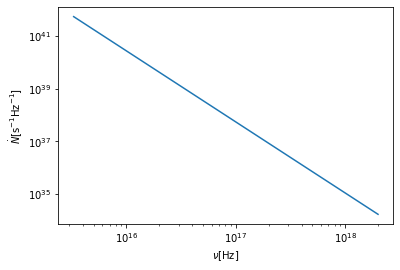

In [6]:
nuArr=np.logspace(np.log10(nu912),np.log10(nu_hi),100)
plt.plot(nuArr,Ndot_nu_spec(nuArr,L_nu_at912,nu912,alpha_nu_blue))
plt.xlabel(r"$\nu \rm [Hz]$")
plt.ylabel(r"$\dot{N} \rm [s^{-1}Hz^{-1}]$")
plt.loglog()

In [16]:
M1450_to_Ntot(-26.58)

1.2349081134276853e+57

In [7]:
h=4.1e-15 #eV s

In [8]:
xsec=lambda nu:6.3e-18*1.34*(nu/nu912)**-2.99

In [9]:
def intg(nu, L_at_nu0, nu0, alpha_nu,r):
    """
    r should be in [cm]
    """
    return Ndot_nu_spec(nu, L_at_nu0, nu0, alpha_nu)/4./np.pi/r/r*xsec(nu)
    

[]

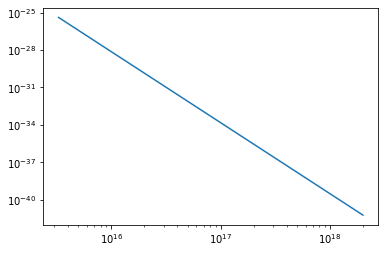

In [10]:
plt.plot(nuArr,intg(nuArr,L_nu_at912,nu912,alpha_nu_blue,3e24))
plt.loglog()

In [11]:
float(df[df["obj"]=="J062-01"]["M1450"])

NameError: name 'df' is not defined

In [ ]:
from pyfrit.convert import M1450_to_Ndot_tot as pyfrit_M1450_to_Ndot_tot

In [12]:
for index, row in df.iterrows():
    print(index,row["obj"],row["redshift"],row["M1450"],M1450_to_Ntot(row["M1450"]))

NameError: name 'df' is not defined

In [10]:
for index, row in df.iterrows():
    print(index,row["obj"],row["M1450"],pyfrit_M1450_to_Ndot_tot(row["M1450"],1.7),pyfrit_M1450_to_Ndot_tot(row["M1450"],1.4))

1 J062-01 -28.12 3.1015842881072517e+57 4.3285525819000944e+57
2 J0020-3653 -26.94 1.0461250171143296e+57 1.4599658507374822e+57
3 J0142-3327 -27.81 2.3312217586685653e+57 3.25343921851772e+57
4 P036+03 -27.36 1.5402229418050672e+57 2.1495259751656123e+57
5 J0244-5008 -26.72 8.542472472127657e+56 1.1921823764977756e+57
6 J0252-0503 -26.63 7.862915128683132e+56 1.0973437578990524e+57
7 J0319-1008 -25.36 2.4410888553392764e+56 3.4067690850583093e+56
8 J0411-0907 -26.61 7.719400753725396e+56 1.0773149771032165e+57
9 J1007+2115 -26.73 8.621514996725457e+56 1.2032135042101391e+57
10 J158-14 -27.32 1.4845115741632177e+57 2.0717755218982364e+57
11 J1104+2134 -26.67 8.157997877174128e+56 1.138525330740793e+57
12 J1212+0505 -26.83 9.453303211630928e+56 1.3192973726714514e+57
13 J1217+0131 -25.76 3.5284469154320434e+56 4.924279525290999e+56
14 J1526-2050 -27.2 1.3291793575563078e+57 1.854994804435801e+57
15 J2002-3013 -26.9 1.00828565383391e+57 1.4071574604406413e+57
16 J1030+0524 -26.93 1.03653

In [43]:
for row in df["M1450"]:
    print(pyfrit_M1450_to_Ndot_tot(row,1.7)/M1450_to_Ntot(row))

0.6908582433718404
0.6264824999452471
0.673331518219757
0.6486776638821771
0.6151612121059788
0.6105889549315342
0.5495774997816608
0.6095775217926985
0.6156713494842634
0.6465303905832969
0.6126168586134235
0.620796048658096
0.568105434802501
0.6401311244799102
0.6244086977793164
0.6259634045864552
0.6080635126418986
0.6595214789562865
0.6161819099063615


In [26]:
2.296120330590953e+57/1.4845115741632177e+57

1.5467177020059402

In [25]:
1.41212988452077e+57/8.701288892798577e+56

1.62289736833067